In [68]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis






In [2]:
df= pd.read_csv('./DATA/pain_dataset_all_subjects.csv')

In [3]:
df.head()

,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Subject,Age,Gender,Height_cm,Weight_kg
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,Subject1,30,M,177,94
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,Subject1,30,M,177,94
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,Subject1,30,M,177,94
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,Subject1,30,M,177,94
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,Subject1,30,M,177,94


In [4]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Unsupervised EDA Report", explorative=True)
profile.to_file("./EDA/ydata.html")  # or profile.to_file("eda_report.html")


ModuleNotFoundError: No module named 'ydata_profiling'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SpO2       46109 non-null  float64
 1   HR         46109 non-null  float64
 2   AccX       46109 non-null  float64
 3   AccY       46109 non-null  float64
 4   AccZ       46109 non-null  float64
 5   Temp       46109 non-null  float64
 6   EDA        46109 non-null  float64
 7   Subject    46109 non-null  object 
 8   Age        46109 non-null  int64  
 9   Gender     46109 non-null  object 
 10  Height_cm  46109 non-null  int64  
 11  Weight_kg  46109 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 4.2+ MB


In [ ]:
df.isnull().sum()


SpO2         0
HR           0
AccX         0
AccY         0
AccZ         0
Temp         0
EDA          0
Subject      0
Age          0
Gender       0
Height_cm    0
Weight_kg    0
dtype: int64

In [ ]:
df.shape

(46109, 12)

In [5]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SpO2       46109 non-null  float64
 1   HR         46109 non-null  float64
 2   AccX       46109 non-null  float64
 3   AccY       46109 non-null  float64
 4   AccZ       46109 non-null  float64
 5   Temp       46109 non-null  float64
 6   EDA        46109 non-null  float64
 7   Subject    46109 non-null  object 
 8   Age        46109 non-null  int64  
 9   Gender     46109 non-null  object 
 10  Height_cm  46109 non-null  int64  
 11  Weight_kg  46109 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 4.2+ MB


In [7]:
df.head()

,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Subject,Age,Gender,Height_cm,Weight_kg
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,Subject1,30,M,177,94
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,Subject1,30,M,177,94
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,Subject1,30,M,177,94
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,Subject1,30,M,177,94
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,Subject1,30,M,177,94


In [8]:
final_df=df.copy()

In [9]:
final_df.drop('Age',axis=1,inplace=True)

In [10]:
final_df.drop('Weight_kg',axis=1,inplace=True)


In [11]:
final_df.head()

,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Subject,Gender,Height_cm
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,Subject1,M,177
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,Subject1,M,177
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,Subject1,M,177
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,Subject1,M,177
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,Subject1,M,177


In [12]:
final_df['Gender'] = final_df['Gender'].map({'M': 0, 'F': 1})
print(final_df['Gender'])


0        0
1        0
2        0
3        0
4        0
        ..
46104    1
46105    1
46106    1
46107    1
46108    1
Name: Gender, Length: 46109, dtype: int64


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SpO2       46109 non-null  float64
 1   HR         46109 non-null  float64
 2   AccX       46109 non-null  float64
 3   AccY       46109 non-null  float64
 4   AccZ       46109 non-null  float64
 5   Temp       46109 non-null  float64
 6   EDA        46109 non-null  float64
 7   Subject    46109 non-null  object 
 8   Gender     46109 non-null  int64  
 9   Height_cm  46109 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 3.5+ MB


In [14]:
final_df['Subject'] = final_df['Subject'].str.extract(r'(\d+)').astype(int)


In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SpO2       46109 non-null  float64
 1   HR         46109 non-null  float64
 2   AccX       46109 non-null  float64
 3   AccY       46109 non-null  float64
 4   AccZ       46109 non-null  float64
 5   Temp       46109 non-null  float64
 6   EDA        46109 non-null  float64
 7   Subject    46109 non-null  int64  
 8   Gender     46109 non-null  int64  
 9   Height_cm  46109 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 3.5 MB


In [16]:
final_df.head()

,SpO2,HR,AccX,AccY,AccZ,Temp,EDA,Subject,Gender,Height_cm
0,96.999969,89.000763,0.760015,-0.869990,-0.100004,30.100043,0.083039,1,0,177
1,96.999969,88.000137,0.750005,-0.869990,-0.110031,30.100043,0.081028,1,0,177
2,96.999969,87.000443,0.750005,-0.869990,-0.110031,30.100043,0.083039,1,0,177
3,96.999969,87.000443,0.750005,-0.879993,-0.100004,30.100043,0.083039,1,0,177
4,96.999969,87.000443,0.760015,-0.859987,-0.100004,30.100043,0.081028,1,0,177


In [17]:
final_df.drop('Height_cm',axis=1,inplace=True)


In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46109 entries, 0 to 46108
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SpO2     46109 non-null  float64
 1   HR       46109 non-null  float64
 2   AccX     46109 non-null  float64
 3   AccY     46109 non-null  float64
 4   AccZ     46109 non-null  float64
 5   Temp     46109 non-null  float64
 6   EDA      46109 non-null  float64
 7   Subject  46109 non-null  int64  
 8   Gender   46109 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 3.2 MB


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(final_df[["EDA", "HR", "Temp", "SpO2", "AccX", "AccY", "AccZ"]])


In [37]:

df_scaled = pd.DataFrame(df_scaled, columns=["EDA", "HR", "Temp", "SpO2", "AccX", "AccY", "AccZ"])

In [38]:
print(df_scaled.head())

print(df_scaled.shape)

        EDA        HR      Temp      SpO2      AccX      AccY      AccZ
0 -0.782556  0.763480 -1.133523  0.622977  0.437645 -0.644466  0.161169
1 -0.783503  0.698079 -1.133523  0.622977  0.416661 -0.644466  0.134616
2 -0.782556  0.632740 -1.133523  0.622977  0.416661 -0.644466  0.134616
3 -0.782556  0.632740 -1.133523  0.622977  0.416661 -0.680700  0.161169
4 -0.783503  0.632740 -1.133523  0.622977  0.437645 -0.608233  0.161169
(46109, 7)


In [39]:
# FEATURE EXTRACTION

#SETTING WINDOW SIZE

window_size=30

num_windows= len(df_scaled)//window_size





In [ ]:
# EXTRACTING FEATURES PER WINDOW

def extract_features(window):
    features={}

    for col in window.columns:
        values= window[col].values

        features[f'{col}_mean'] = np.mean(values)
        features[f'{col}_std'] = np.std(values)
        features[f'{col}_min'] = np.min(values)
        features[f'{col}_max'] = np.max(values)
        features[f'{col}_range'] = np.max(values) - np.min(values)
        features[f'{col}_slope'] = np.polyfit(np.arange(len(values)), values, 1)[0]  # Linear trend
        features[f'{col}_skew'] = skew(values)
        features[f'{col}_kurtosis'] = kurtosis(values)

    return features



feature_list=[]

for i in range(num_windows):
    start_idx= i*window_size
    end_idx= start_idx+window_size

    window= df_scaled.iloc[start_idx:end_idx]
    
    features= extract_features(window)
    features['window_id']=i
    feature_list.append(features)


df_features= pd.DataFrame(feature_list)


print(df_features.shape)

df_features.head()

df_features.to_csv('timeseries_windowed_features.csv', index=False)






    

C:\Users\dyash\AppData\Local\Temp\ipykernel_14916\4253979503.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{col}_skew'] = skew(values)
C:\Users\dyash\AppData\Local\Temp\ipykernel_14916\4253979503.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{col}_kurtosis'] = kurtosis(values)


(1536, 57)


In [45]:
df= pd.read_csv('./DATA/timeseries_windowed_features.csv')

In [57]:
#SCALING THE FEATURES
df_filled = df.fillna(df.median(numeric_only=True))

scaler= StandardScaler()
scaled_features= scaler.fit_transform(df_filled.drop(columns=['window_id']))


In [58]:
#DIMENSIONALITY REDUCTION

from sklearn.decomposition import PCA


        PC1       PC2
0 -1.262079  0.875063
1 -1.372779  0.688033
2 -0.316317 -1.782841
3 -1.746301 -1.026533
4 -1.815883 -1.688380
(1536, 2)


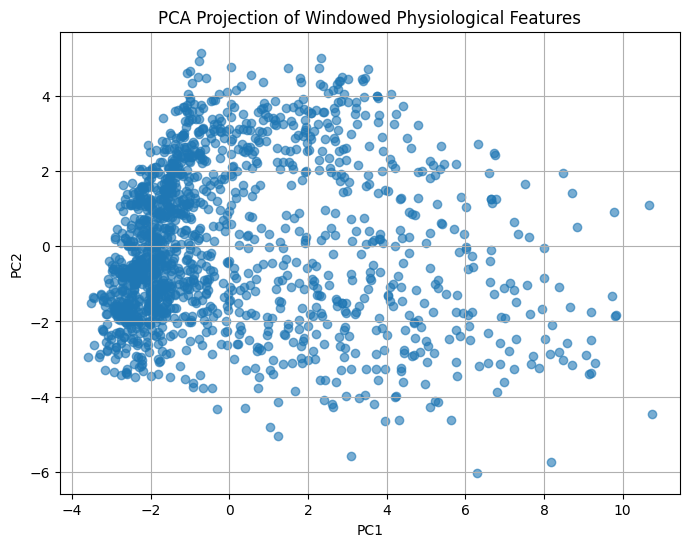

In [64]:
pca =PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

print(pca_df.head())
print(pca_df.shape)


plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6)
plt.title("PCA Projection of Windowed Physiological Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [65]:
#CLUSTERING USING K-MEANS

from sklearn.cluster import KMeans

In [74]:
kmeans = KMeans(n_clusters=4, random_state=0)  # Try 2–5 clusters
kmeans_labels = kmeans.fit_predict(scaled_features)

pca_df['cluster'] = kmeans_labels





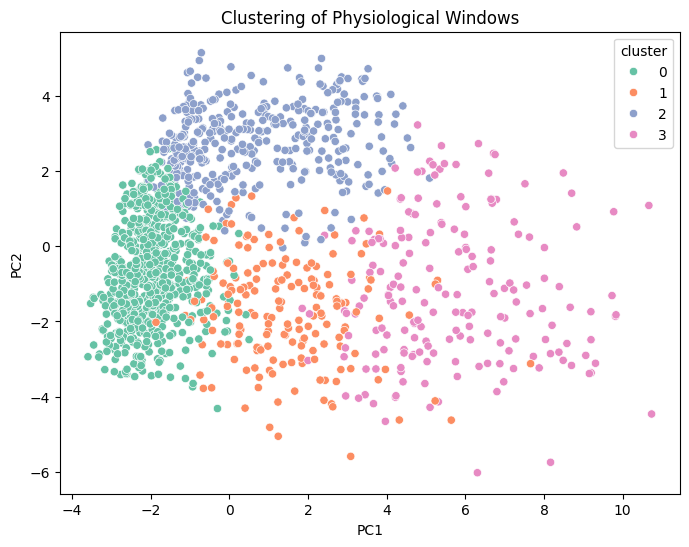

In [75]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title("Clustering of Physiological Windows")
plt.show()

In [ ]:
df_features['cluster'] = kmeans_labels
df_features.groupby('cluster').mean()

,EDA_mean,EDA_std,EDA_min,EDA_max,EDA_range,EDA_slope,EDA_skew,EDA_kurtosis,HR_mean,HR_std,...,AccY_kurtosis,AccZ_mean,AccZ_std,AccZ_min,AccZ_max,AccZ_range,AccZ_slope,AccZ_skew,AccZ_kurtosis,window_id
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.072934,0.014590,0.049745,0.101097,0.051352,-0.000542,0.020758,0.387335,-0.559835,0.124313,...,3.357316,0.340567,0.018912,0.301375,0.378475,0.077100,-0.000020,0.102454,4.683565,784.697047
1,0.395268,0.058861,0.274842,0.485664,0.210822,-0.000845,0.173865,2.653820,-0.123587,0.257646,...,8.607797,0.315139,0.243984,-0.083218,0.980792,1.064010,-0.001791,0.895675,7.907079,832.061111
2,-0.304416,0.022169,-0.340474,-0.259766,0.080708,0.000349,0.044445,-0.070521,0.979211,0.196013,...,2.480598,-0.742323,0.140281,-1.029117,-0.453184,0.575933,-0.000441,-0.025611,3.350792,677.994845
3,-0.048875,0.054934,-0.160009,0.046334,0.206343,0.002197,-0.211996,1.809765,0.419088,0.272857,...,2.340713,-0.190465,0.950871,-1.795187,1.730655,3.525842,0.006727,0.350090,2.131265,818.878307
